# Python 프로그래밍 Pandas
## 데이터프레임 Dataframe

In [235]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Pandas
- DataFrame이 무엇인지 이해한다.
- csv파일, 엑셀파일, DB의데이터를 가져오고 다시 저장해본다
- 탐색적분석을 수행해 본다
- 필요한 데이터를 선택해 가져온다
- 변수를 만들어 Dataframe에 추가하고 삭제한다
- DataFrame을 서로 연결한다

## Pandas 란
- 다른 Dataframe이나 고차원 객체로부터 컬럼을 추가 삭제
- group by함수
- 라벨 등을 이용한 데이터 부분 집합 추출
- 데이터 세로 가로 합치기
- 외부 데이터 연동의 견고함(CSV, Excel, databases, HDF5지원)
- missing data(NaN) 처리

https://pandas.pydata.org/pandas-docs/stable/

In [241]:
import os
import numpy as np
import pandas as pd
#os.chdir('d:/')
os.getcwd()
'**'.join(os.listdir('.'))

'D:\\my\\script'

'.ipynb_checkpoints**Faker.ipynb**JPype1-0.7.0-cp37-cp37m-win_amd64.whl**JPype1-0.7.0-cp38-cp38-win_amd64.whl**K-Stratified.ipynb**konlpy_test.ipynb**main.py**mod1.py**mod2.py**October.ipynb**PDP_SHAP_visualization.ipynb**plot_label_propagation_versus_svm_iris.ipynb**Python_basic.ipynb**Python_numpy.ipynb**Python_pandas.ipynb**submission_knn.csv**submission_rbf.csv**text-preprocessing-using-python.ipynb**text_1101.ipynb**Untitled.ipynb**Untitled1.ipynb**__pycache__'

# 파일 불러오기

In [244]:
dt = pd.DataFrame({'a':[1,2,3], 'b':[4,5,6], 'c':[7,8,9]}, index=[10,11,12])
df = pd.DataFrame([[1,4,7], [2,5,8], [3,6,9]], columns=['a', 'b', 'c'], index=[10,11,12])
dt
df

,a,b,c
10,1,4,7
11,2,5,8
12,3,6,9


,a,b,c
10,1,4,7
11,2,5,8
12,3,6,9


In [249]:
arr = np.arange(1,10).reshape(3,3)
arr
arr = arr.T
arr

df = pd.DataFrame(arr, columns=list('abc'), index=[10,11,12])
df

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

,a,b,c
10,1,4,7
11,2,5,8
12,3,6,9


In [254]:
pd.DataFrame({'a':[1,2,3], 'b':[4,5,6], 'c':[7,8,9]})
pd.DataFrame({'a':[1,2,3], 'b':[4,5,6], 'c':[7,8,9]}, index=[10,11,12])
pd.DataFrame({'a':[1,2,3], 'b':[4,5,6], 'c':[7,8,9]}, columns=[10,11,12])
pd.DataFrame({'a':[1,2,3], 'b':[4,5,6], 'c':[7,8,9]}, columns=['c', 'b', 'a'])
pd.DataFrame({'a':[1,2,3], 'b':[4,5,6], 'c':[7,8,9]},index=[10,11,12], columns=[13,14,15])

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


,a,b,c
10,1,4,7
11,2,5,8
12,3,6,9


,10,11,12


,c,b,a
0,7,4,1
1,8,5,2
2,9,6,3


,13,14,15
10,NaN,NaN,NaN
11,NaN,NaN,NaN
12,NaN,NaN,NaN


### https://www.data.go.kr/dataset/15003493/fileData.do

In [255]:
%pwd

'D:\\my\\script'

In [256]:
data = pd.read_csv('../data/도로교통공단_교통사고다발지역_20191010.csv') # 한글명 파일이 잘 안읽힘

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 0: invalid start byte

In [273]:
data = pd.read_csv(open('../data/도로교통공단_교통사고다발지역_20191010.csv', 'r'))

data = pd.read_csv('../data/도로교통공단_교통사고다발지역_20191010.csv', encoding='euc-kr')

data = pd.read_csv('../data/도로교통공단_교통사고다발지역_20191010.csv', sep=',', encoding='euc-kr')

In [269]:
data.to_csv('../working/도로교통공단_교통사고다발지역_20191010.csv', encoding='euc-kr')

## 기본정보

In [274]:
data.head()
data.tail()

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
0,2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10
1,2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10
2,2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10
3,2013060,2012,스쿨존어린이,11290003,서울특별시 성북구3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,37.610429,127.059596,"{type:Polygon,coordinates:[[[127.0619982,37.61...",2019-10-10
4,2013060,2012,스쿨존어린이,11320001,서울특별시 도봉구1,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,2,0,37.648129,127.024430,"{type:Polygon,coordinates:[[[127.0268336,37.65...",2019-10-10


,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
10360,2019066,2018,무단횡단,280641002,경기 파주2,경기도 파주시 금촌동(우리은행 파주금융센터 부근),5,7,0,2,5,0,37.757022,126.773592,"{type:Polygon,coordinates:[[[126.77628656,37.7...",2019-10-10
10361,2019066,2018,무단횡단,280641003,경기 파주3,경기도 파주시 조리읍(봉일천우체국 부근),5,5,0,2,3,0,37.743755,126.806671,"{type:Polygon,coordinates:[[[126.80936607,37.7...",2019-10-10
10362,2019066,2018,무단횡단,280641004,경기 파주4,경기도 파주시 금촌동(금촌사거리 부근),4,4,0,2,2,0,37.763186,126.773463,"{type:Polygon,coordinates:[[[126.77615816,37.7...",2019-10-10
10363,2019066,2018,무단횡단,280941001,경기 구리1,경기도 구리시 수택동(세븐일레븐 구리으뜸점 부근),6,6,0,2,4,0,37.598290,127.136542,"{type:Polygon,coordinates:[[[127.13923669,37.5...",2019-10-10
10364,2019066,2018,무단횡단,281041001,경기 포천1,경기도 포천시 소흘읍(송우순복음교회 부근),4,5,0,1,4,0,37.825582,127.143884,"{type:Polygon,coordinates:[[[127.14657884,37.8...",2019-10-10


In [283]:
data.shape
data.index
data.columns
data[1:3].head()
data[1:3].values
data.iloc[1:3, 1:8]
data.iloc[1:3, 1:8].values

(10365, 16)

RangeIndex(start=0, stop=10365, step=1)

Index(['사고지역관리번호', '사고년도', '사고유형구분', '위치코드', '시도시군구명', '사고지역위치명', '발생건수',
       '사상자수', '사망자수', '중상자수', '경상자수', '부상자수', '위도', '경도', '사고다발지역폴리곤정보',
       '데이터기준일자'],
      dtype='object')

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
1,2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10
2,2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10


array([[2013060, 2012, '스쿨존어린이', 11290001, '서울특별시 성북구1',
        '서울특별시 성북구 종암동(숭례초교 부근)', 2, 2, 0, 0, 1, 1, 37.59550472,
        127.0357332,
        '{type:Polygon,coordinates:[[[127.0381354,37.597416],[127.03773,37.5976915],[127.0372755,37.5979131],[127.036783,37.5980754],[127.0362647,37.5981744],[127.0357332,37.5982077],[127.0352018,37.5981744],[127.0346835,37.5980754],[127.034191,37.5979131],[127.0337365,37.5976915],[127.0333311,37.597416],[127.0329849,37.5970935],[127.0327064,37.5967318],[127.0325024,37.5963399],[127.032378,37.5959275],[127.0323362,37.5955047],[127.0323781,37.5950818],[127.0325025,37.5946694],[127.0327065,37.5942776],[127.0329851,37.5939159],[127.0333312,37.5935934],[127.0337366,37.5933179],[127.0341911,37.5930963],[127.0346835,37.592934],[127.0352018,37.592835],[127.0357332,37.5928017],[127.0362646,37.592835],[127.0367829,37.592934],[127.0372754,37.5930963],[127.0377299,37.5933179],[127.0381352,37.5935934],[127.0384814,37.5939159],[127.03876,37.5942776],[127.038

,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수
1,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2
2,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2


array([[2012, '스쿨존어린이', 11290001, '서울특별시 성북구1', '서울특별시 성북구 종암동(숭례초교 부근)',
        2, 2],
       [2012, '스쿨존어린이', 11290002, '서울특별시 성북구2',
        '서울특별시 성북구 동소문동7가(정덕초교 부근)', 2, 2]], dtype=object)

In [286]:
len(data)
data.index
len(data.index)
data.columns
len(data.columns)

10365

RangeIndex(start=0, stop=10365, step=1)

10365

Index(['사고지역관리번호', '사고년도', '사고유형구분', '위치코드', '시도시군구명', '사고지역위치명', '발생건수',
       '사상자수', '사망자수', '중상자수', '경상자수', '부상자수', '위도', '경도', '사고다발지역폴리곤정보',
       '데이터기준일자'],
      dtype='object')

16

In [288]:
data.describe()
data.dtypes
data.info()

,사고지역관리번호,사고년도,위치코드,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
count,1.036500e+04,10365.000000,1.036500e+04,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000
mean,2.015809e+06,2014.731693,6.909470e+07,4.750796,5.018138,0.234250,2.389194,2.046792,0.348288,36.596723,127.540724
std,1.932015e+03,1.955133,1.018650e+08,2.038119,2.275687,0.508633,1.743488,1.569080,0.706061,1.057973,0.856784
min,2.013060e+06,2012.000000,1.111000e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.247238,126.257418
25%,2.014109e+06,2013.000000,2.623000e+07,3.000000,4.000000,0.000000,1.000000,1.000000,0.000000,35.830915,126.913266
50%,2.016146e+06,2015.000000,4.113500e+07,4.000000,4.000000,0.000000,2.000000,2.000000,0.000000,37.150031,127.086867
75%,2.017050e+06,2016.000000,4.713000e+07,5.000000,6.000000,0.000000,3.000000,3.000000,1.000000,37.522943,128.531153
max,2.019066e+06,2018.000000,5.021040e+08,27.000000,31.000000,4.000000,22.000000,15.000000,9.000000,38.210994,129.503616


사고지역관리번호         int64
사고년도             int64
사고유형구분          object
위치코드             int64
시도시군구명          object
사고지역위치명         object
발생건수             int64
사상자수             int64
사망자수             int64
중상자수             int64
경상자수             int64
부상자수             int64
위도             float64
경도             float64
사고다발지역폴리곤정보     object
데이터기준일자         object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10365 entries, 0 to 10364
Data columns (total 16 columns):
사고지역관리번호       10365 non-null int64
사고년도           10365 non-null int64
사고유형구분         10365 non-null object
위치코드           10365 non-null int64
시도시군구명         10365 non-null object
사고지역위치명        10365 non-null object
발생건수           10365 non-null int64
사상자수           10365 non-null int64
사망자수           10365 non-null int64
중상자수           10365 non-null int64
경상자수           10365 non-null int64
부상자수           10365 non-null int64
위도             10365 non-null float64
경도             10365 non-null float64
사고다발지역폴리곤정보    10365 non-null object
데이터기준일자        10365 non-null object
dtypes: float64(2), int64(9), object(5)
memory usage: 1.3+ MB


In [289]:
data.count()
data.nunique()
data.사고유형구분.unique()

사고지역관리번호       10365
사고년도           10365
사고유형구분         10365
위치코드           10365
시도시군구명         10365
사고지역위치명        10365
발생건수           10365
사상자수           10365
사망자수           10365
중상자수           10365
경상자수           10365
부상자수           10365
위도             10365
경도             10365
사고다발지역폴리곤정보    10365
데이터기준일자        10365
dtype: int64

사고지역관리번호          35
사고년도               7
사고유형구분             5
위치코드            2342
시도시군구명          2014
사고지역위치명         8568
발생건수              25
사상자수              28
사망자수               5
중상자수              21
경상자수              13
부상자수               9
위도             10288
경도             10286
사고다발지역폴리곤정보    10322
데이터기준일자            1
dtype: int64

array(['스쿨존어린이', '보행어린이', '보행노인', '자전거', '무단횡단'], dtype=object)

In [292]:
data.describe()
data.describe().index
data.describe().columns

,사고지역관리번호,사고년도,위치코드,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
count,1.036500e+04,10365.000000,1.036500e+04,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000
mean,2.015809e+06,2014.731693,6.909470e+07,4.750796,5.018138,0.234250,2.389194,2.046792,0.348288,36.596723,127.540724
std,1.932015e+03,1.955133,1.018650e+08,2.038119,2.275687,0.508633,1.743488,1.569080,0.706061,1.057973,0.856784
min,2.013060e+06,2012.000000,1.111000e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.247238,126.257418
25%,2.014109e+06,2013.000000,2.623000e+07,3.000000,4.000000,0.000000,1.000000,1.000000,0.000000,35.830915,126.913266
50%,2.016146e+06,2015.000000,4.113500e+07,4.000000,4.000000,0.000000,2.000000,2.000000,0.000000,37.150031,127.086867
75%,2.017050e+06,2016.000000,4.713000e+07,5.000000,6.000000,0.000000,3.000000,3.000000,1.000000,37.522943,128.531153
max,2.019066e+06,2018.000000,5.021040e+08,27.000000,31.000000,4.000000,22.000000,15.000000,9.000000,38.210994,129.503616


Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

Index(['사고지역관리번호', '사고년도', '위치코드', '발생건수', '사상자수', '사망자수', '중상자수', '경상자수',
       '부상자수', '위도', '경도'],
      dtype='object')

In [294]:
data.describe().loc['75%', '중상자수']

3.0

In [298]:
data.isnull().head()

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [299]:
data.notnull().head()

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [301]:
data.isnull().sum()
data.notnull().sum()
data.isnull().sum().sum()
data.notnull().sum().sum()

사고지역관리번호       0
사고년도           0
사고유형구분         0
위치코드           0
시도시군구명         0
사고지역위치명        0
발생건수           0
사상자수           0
사망자수           0
중상자수           0
경상자수           0
부상자수           0
위도             0
경도             0
사고다발지역폴리곤정보    0
데이터기준일자        0
dtype: int64

사고지역관리번호       10365
사고년도           10365
사고유형구분         10365
위치코드           10365
시도시군구명         10365
사고지역위치명        10365
발생건수           10365
사상자수           10365
사망자수           10365
중상자수           10365
경상자수           10365
부상자수           10365
위도             10365
경도             10365
사고다발지역폴리곤정보    10365
데이터기준일자        10365
dtype: int64

0

165840

In [303]:
data.shape

(10365, 16)

In [302]:
data.sum()

사고지역관리번호                                             20893859204
사고년도                                                    20882694
사고유형구분         스쿨존어린이스쿨존어린이스쿨존어린이스쿨존어린이스쿨존어린이스쿨존어린이스쿨존어린이스쿨존어...
위치코드                                                716166558135
시도시군구명         서울특별시 종로구1서울특별시 성북구1서울특별시 성북구2서울특별시 성북구3서울특별시 ...
사고지역위치명        서울특별시 종로구 혜화동(혜화초교 부근)서울특별시 성북구 종암동(숭례초교 부근)서울...
발생건수                                                       49242
사상자수                                                       52013
사망자수                                                        2428
중상자수                                                       24764
경상자수                                                       21215
부상자수                                                        3610
위도                                                        379325
경도                                                   1.32196e+06
사고다발지역폴리곤정보    {type:Polygon,coordinates:[[[127.002009,37.590...
데이터기준일자        2019-10-10

In [304]:
data.count()

사고지역관리번호       10365
사고년도           10365
사고유형구분         10365
위치코드           10365
시도시군구명         10365
사고지역위치명        10365
발생건수           10365
사상자수           10365
사망자수           10365
중상자수           10365
경상자수           10365
부상자수           10365
위도             10365
경도             10365
사고다발지역폴리곤정보    10365
데이터기준일자        10365
dtype: int64

In [305]:
data.median()

사고지역관리번호    2.016146e+06
사고년도        2.015000e+03
위치코드        4.113500e+07
발생건수        4.000000e+00
사상자수        4.000000e+00
사망자수        0.000000e+00
중상자수        2.000000e+00
경상자수        2.000000e+00
부상자수        0.000000e+00
위도          3.715003e+01
경도          1.270869e+02
dtype: float64

In [319]:
np.arange(0.1,1.0, 0.10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [320]:
data.quantile(np.arange(0.1,1.0, 0.10).tolist())

,사고지역관리번호,사고년도,위치코드,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
0.1,2013099.0,2012.0,11350007.0,3.0,3.0,0.0,1.0,0.0,0.0,35.151659,126.771503
0.2,2014105.0,2013.0,11680001.0,3.0,3.0,0.0,1.0,1.0,0.0,35.493661,126.887395
0.3,2014117.0,2013.0,27110003.0,4.0,4.0,0.0,1.0,1.0,0.0,35.865975,126.942070
0.4,2015048.0,2014.0,28237004.0,4.0,4.0,0.0,2.0,1.0,0.0,36.324585,127.033793
0.5,2016146.0,2015.0,41135001.0,4.0,4.0,0.0,2.0,2.0,0.0,37.150031,127.086867
0.6,2016147.0,2015.0,41480003.0,5.0,5.0,0.0,3.0,2.0,0.0,37.443996,127.249809
0.7,2017029.0,2016.0,45140002.0,5.0,5.0,0.0,3.0,3.0,0.0,37.501537,127.942147
0.8,2018029.0,2017.0,48240003.0,6.0,6.0,0.0,3.0,3.0,1.0,37.545095,128.582920
0.9,2019035.0,2018.0,210310003.0,7.0,8.0,1.0,4.0,4.0,1.0,37.604412,129.022467


In [321]:
data.describe()

,사고지역관리번호,사고년도,위치코드,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
count,1.036500e+04,10365.000000,1.036500e+04,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000
mean,2.015809e+06,2014.731693,6.909470e+07,4.750796,5.018138,0.234250,2.389194,2.046792,0.348288,36.596723,127.540724
std,1.932015e+03,1.955133,1.018650e+08,2.038119,2.275687,0.508633,1.743488,1.569080,0.706061,1.057973,0.856784
min,2.013060e+06,2012.000000,1.111000e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.247238,126.257418
25%,2.014109e+06,2013.000000,2.623000e+07,3.000000,4.000000,0.000000,1.000000,1.000000,0.000000,35.830915,126.913266
50%,2.016146e+06,2015.000000,4.113500e+07,4.000000,4.000000,0.000000,2.000000,2.000000,0.000000,37.150031,127.086867
75%,2.017050e+06,2016.000000,4.713000e+07,5.000000,6.000000,0.000000,3.000000,3.000000,1.000000,37.522943,128.531153
max,2.019066e+06,2018.000000,5.021040e+08,27.000000,31.000000,4.000000,22.000000,15.000000,9.000000,38.210994,129.503616


In [325]:
from sklearn import datasets
iris = datasets.load_iris()

In [363]:
data = pd.DataFrame(iris.data, columns = ['A', 'B', 'C', 'D'])
iris.target
data['iris'] = pd.Series(iris.target)
data.head()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

,A,B,C,D,iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [364]:
data.mean()
data.mean().shape
data.mean(axis=1).head()
data.mean(axis='index')
data.mean(axis='columns').head()

A       5.843333
B       3.057333
C       3.758000
D       1.199333
iris    1.000000
dtype: float64

(5,)

0    2.04
1    1.90
2    1.88
3    1.88
4    2.04
dtype: float64

A       5.843333
B       3.057333
C       3.758000
D       1.199333
iris    1.000000
dtype: float64

0    2.04
1    1.90
2    1.88
3    1.88
4    2.04
dtype: float64

# 상세정보 확인

In [369]:
data['A'].head(), data.A.head()
data.iris.value_counts()

(0    5.1
 1    4.9
 2    4.7
 3    4.6
 4    5.0
 Name: A, dtype: float64, 0    5.1
 1    4.9
 2    4.7
 3    4.6
 4    5.0
 Name: A, dtype: float64)

2    50
1    50
0    50
Name: iris, dtype: int64

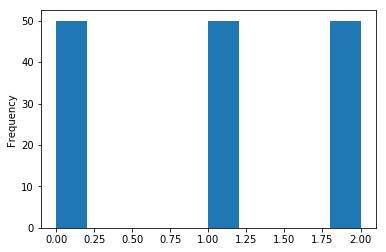

In [371]:
import matplotlib.pyplot as plt
data.iris.plot(kind='hist')

(150, 6)

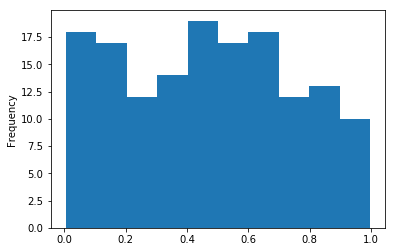

In [374]:
data.shape
data['rand'] = np.random.rand(150)
data.rand.plot(kind='hist')

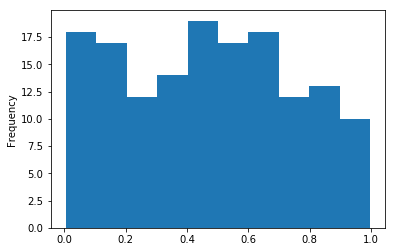

In [377]:
data.rand.plot.hist()

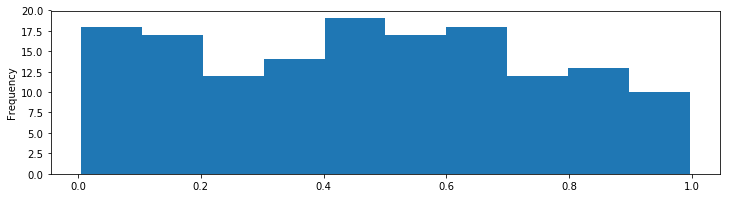

In [379]:
data.rand.plot(kind='hist', figsize=(12,3))

In [391]:
data = pd.read_csv('../data/도로교통공단_교통사고다발지역_20191010.csv', sep=',', encoding='euc-kr')
data.columns

Index(['사고지역관리번호', '사고년도', '사고유형구분', '위치코드', '시도시군구명', '사고지역위치명', '발생건수',
       '사상자수', '사망자수', '중상자수', '경상자수', '부상자수', '위도', '경도', '사고다발지역폴리곤정보',
       '데이터기준일자'],
      dtype='object')

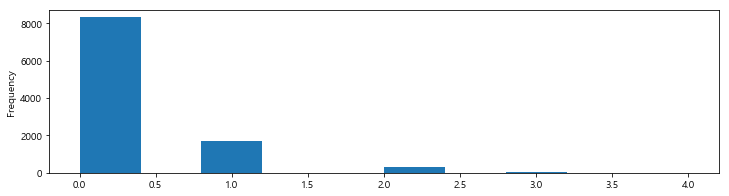

In [392]:
data.사망자수.plot(kind='hist', figsize=(12,3))

Index(['사고지역관리번호', '사고년도', '사고유형구분', '위치코드', '시도시군구명', '사고지역위치명', '발생건수',
       '사상자수', '사망자수', '중상자수', '경상자수', '부상자수', '위도', '경도', '사고다발지역폴리곤정보',
       '데이터기준일자'],
      dtype='object')

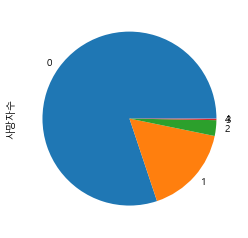

In [385]:
plt.rcParams['font.family'] = 'Malgun Gothic'
data.사망자수.value_counts().plot(kind='pie')

In [393]:
data.사망자수.max()
data.사망자수.min()
data.사망자수.mean()
data.사망자수.std()
data.사망자수.quantile([0.25, 0.5, 0.90])
data.사망자수.isnull().head()
data.사망자수.isnull().sum()

4

0

0.2342498794018331

0.5086326647501088

0.25    0.0
0.50    0.0
0.90    1.0
Name: 사망자수, dtype: float64

0    False
1    False
2    False
3    False
4    False
Name: 사망자수, dtype: bool

0

In [398]:
data.columns
data.사고유형구분.value_counts()
data.사고유형구분.value_counts().index

Index(['사고지역관리번호', '사고년도', '사고유형구분', '위치코드', '시도시군구명', '사고지역위치명', '발생건수',
       '사상자수', '사망자수', '중상자수', '경상자수', '부상자수', '위도', '경도', '사고다발지역폴리곤정보',
       '데이터기준일자'],
      dtype='object')

보행노인      3919
자전거       3315
무단횡단      2006
보행어린이      852
스쿨존어린이     273
Name: 사고유형구분, dtype: int64

Index(['보행노인', '자전거', '무단횡단', '보행어린이', '스쿨존어린이'], dtype='object')

In [404]:
type(data.사고유형구분.value_counts())
data.사고유형구분.value_counts()['무단횡단']
data.사고유형구분.value_counts().sort_values()
data.사고유형구분.value_counts().sort_index()

pandas.core.series.Series

2006

스쿨존어린이     273
보행어린이      852
무단횡단      2006
자전거       3315
보행노인      3919
Name: 사고유형구분, dtype: int64

무단횡단      2006
보행노인      3919
보행어린이      852
스쿨존어린이     273
자전거       3315
Name: 사고유형구분, dtype: int64

In [407]:
data.shape

(10365, 17)

In [417]:
data.columns
data['A'] = 0.5
data['A'] = np.arange(10365)
data[['사고년도', '사고유형구분']].head()
data['B'] = data['A'] >= 500
data.B.value_counts()
data.B.value_counts(dropna = False)
data['B'].sort_values().head()
data['B'].sort_values().tail()

Index(['사고지역관리번호', '사고년도', '사고유형구분', '위치코드', '시도시군구명', '사고지역위치명', '발생건수',
       '사상자수', '사망자수', '중상자수', '경상자수', '부상자수', '위도', '경도', '사고다발지역폴리곤정보',
       '데이터기준일자', 'A', 'B'],
      dtype='object')

,사고년도,사고유형구분
0,2012,스쿨존어린이
1,2012,스쿨존어린이
2,2012,스쿨존어린이
3,2012,스쿨존어린이
4,2012,스쿨존어린이


True     9865
False     500
Name: B, dtype: int64

True     9865
False     500
Name: B, dtype: int64

0      False
341    False
340    False
339    False
338    False
Name: B, dtype: bool

3790     True
3791     True
3792     True
3785     True
10364    True
Name: B, dtype: bool

# End 